<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/00Preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [4]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [5]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [6]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [7]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [8]:
A = torch.arange(6).reshape(6, 1)
A

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5]])

In [9]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X)

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]))

In [10]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [11]:
A.shape, A.sum(axis=0).shape, A.sum(axis=0)

(torch.Size([2, 3]), torch.Size([3]), tensor([3., 5., 7.]))

In [12]:
A.shape, A.sum(axis=1).shape, A.sum(axis=1)

(torch.Size([2, 3]), torch.Size([2]), tensor([ 3., 12.]))

In [13]:
A.sum(axis=[0, 1])  # Same as A.sum()

tensor(15.)

In [14]:
import numpy as np

In [15]:
import numpy as np

# Define a function f for which you want to calculate the numerical limit.
# For example, let's define f(x) = x**2
def f(x):
    return x**2

for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.10000
h=0.01000, numerical limit=2.01000
h=0.00100, numerical limit=2.00100
h=0.00010, numerical limit=2.00010
h=0.00001, numerical limit=2.00001


In [16]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In PyTorch, requires_grad_() is a method used to change the requires_grad attribute of an existing tensor in-place. When a tensor has requires_grad=True, PyTorch will track all operations on it to enable automatic differentiation (autograd). This is crucial for training neural networks, as it allows PyTorch to compute gradients of a loss function with respect to the model's parameters.

Here's how it works and why you'd use it:

Tracking History: If requires_grad is True, PyTorch builds a computational graph for every operation performed on that tensor. This graph records how the output was computed from the inputs.
Gradient Computation: Later, when you call .backward() on a scalar output that depends on this tensor, PyTorch uses this computational graph to automatically calculate the gradients of the output with respect to the tensor (and any other tensors in the graph that require_grad=True).
In-Place Modification: The underscore (_) in requires_grad_ indicates that it's an in-place operation, meaning it modifies the tensor directly rather than returning a new one. This is often more memory-efficient.
Example:

Imagine you have a tensor x:

x = torch.tensor([1., 2., 3.])

By default, x.requires_grad would be False. If you then calculate y = x * x, no gradient information would be stored, and you wouldn't be able to call y.backward() to find dy/dx.

However, if you do:

x = torch.tensor([1., 2., 3.]) x.requires_grad_(True)

Now, x.requires_grad is True. If you then proceed with calculations like:

y = 2 * torch.dot(x, x) (similar to one of the examples in your notebook)

PyTorch will track all these operations. When you call y.backward(), it will compute the gradients of y with respect to x, and these gradients will be stored in x.grad.

In [17]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [18]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

The value of x.grad is calculated through PyTorch's automatic differentiation mechanism, specifically after calling y.backward(). This operation computes the gradient of y with respect to x.

Let's break it down:

Define x and y:

x = torch.arange(4.0) results in x = tensor([0., 1., 2., 3.]).
y = 2 * torch.dot(x, x)
Expand y: If x = [x_0, x_1, x_2, x_3], then torch.dot(x, x) is x_0^2 + x_1^2 + x_2^2 + x_3^2. So, y = 2 * (x_0^2 + x_1^2 + x_2^2 + x_3^2).

Calculate the Partial Derivatives (Gradients): To get x.grad, PyTorch computes the partial derivative of y with respect to each component of x (dy/dx_i):

dy/dx_0 = d/dx_0 [2 * (x_0^2 + x_1^2 + x_2^2 + x_3^2)] = 2 * (2 * x_0) = 4 * x_0
dy/dx_1 = d/dx_1 [2 * (x_0^2 + x_1^2 + x_2^2 + x_3^2)] = 2 * (2 * x_1) = 4 * x_1
dy/dx_2 = d/dx_2 [2 * (x_0^2 + x_1^2 + x_2^2 + x_3^2)] = 2 * (2 * x_2) = 4 * x_2
dy/dx_3 = d/dx_3 [2 * (x_0^2 + x_1^2 + x_2^2 + x_3^2)] = 2 * (2 * x_3) = 4 * x_3
Substitute x values: Now, substitute the values from x = tensor([0., 1., 2., 3.]) into these derivatives:

4 * 0. = 0.
4 * 1. = 4.
4 * 2. = 8.
4 * 3. = 12.
This results in x.grad being tensor([0., 4., 8., 12.]).

In [19]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [20]:
x.grad == 4 * x

tensor([True, True, True, True])

The x.grad value is [1., 1., 1., 1.] in the last block because of the following steps:

x.grad.zero_(): This line explicitly resets the gradients accumulated from previous backward() calls to zero. Before this, x.grad was [0., 4., 8., 12.].

y = x.sum(): The variable y is redefined to be the sum of all elements in x.

x = tensor([0., 1., 2., 3.])
So, y = 0. + 1. + 2. + 3. = 6.
y.backward(): This triggers the computation of gradients of the new y (which is x.sum()) with respect to x. The chain rule is applied.

If y = x_0 + x_1 + x_2 + x_3,
Then the partial derivative dy/dx_0 = 1
dy/dx_1 = 1
dy/dx_2 = 1
dy/dx_3 = 1
Since x.grad was reset to zero before this backward() call, the newly computed gradients ([1., 1., 1., 1.]) are assigned to x.grad.

In [21]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

Let's break down how x.grad became [0., 2., 4., 6.] in that last code block:

x.grad.zero_(): First, any previously accumulated gradients in x.grad are reset to zero. This ensures that we are calculating fresh gradients for the new y definition.

y = x * x: Here, y is redefined. Unlike the previous examples where y was a scalar (2 * torch.dot(x,x) or x.sum()), this operation performs an element-wise multiplication. So, y becomes a tensor of the same shape as x:

x = tensor([0., 1., 2., 3.])
y[0] = 0. * 0. = 0.
y[1] = 1. * 1. = 1.
y[2] = 2. * 2. = 4.
y[3] = 3. * 3. = 9. So, y = tensor([0., 1., 4., 9.]).
y.backward(gradient=torch.ones(len(y))): When y is a non-scalar tensor (like a vector or matrix), y.backward() requires a gradient argument. This argument is a tensor of the same shape as y, and it represents the gradient of the 'overall output' (which y contributes to) with respect to y.

In this case, gradient=torch.ones(len(y)) means gradient=tensor([1., 1., 1., 1.]). This effectively tells PyTorch to consider the sum of y as the final scalar output for which we want gradients.
For each element y_i = x_i^2, the derivative dy_i/dx_i is 2 * x_i.
Since the gradient argument is [1., 1., 1., 1.], the final gradient x.grad_i is effectively 1 * (2 * x_i).
Let's apply this:

For x[0] = 0.: x.grad[0] = 2 * 0. = 0.
For x[1] = 1.: x.grad[1] = 2 * 1. = 2.
For x[2] = 2.: x.grad[2] = 2 * 2. = 4.
For x[3] = 3.: x.grad[3] = 2 * 3. = 6.
This results in x.grad = tensor([0., 2., 4., 6.]).

The comment # Faster: y.sum().backward() is a shortcut that achieves the same result, as y.sum().backward() implicitly uses torch.ones_like(y) as the gradient argument.

In [22]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

The .detach() method in PyTorch is used to create a new tensor that shares the same storage with the original tensor but does not track its history of operations. In simple terms, it removes the tensor from the computational graph, making it a constant for subsequent operations with respect to gradient calculations.

Let's break it down in the context of your code:

y = x * x: Here, y is computed based on x, so PyTorch tracks this operation to compute gradients later.
u = y.detach(): This is where detach() comes in.
u gets the value of y (which is tensor([0., 1., 4., 9.])).
However, u is detached from the computational graph that connects y back to x. This means that any operation involving u will treat u as a constant, not as something whose value depends on x through y.
z = u * x: Now, z is calculated by multiplying u and x element-wise.
When z.sum().backward() is called, PyTorch calculates the gradients of z.sum() with respect to x.
Since u was detached, it's treated as a constant during this gradient calculation. So, if z_i = u_i * x_i, then the derivative dz_i/dx_i is simply u_i (because u_i is treated as a constant coefficient).
Therefore, after z.sum().backward(), x.grad will be equal to u because u acts as the gradient of z with respect to x when u itself is not considered a function of x.

In [23]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [24]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [25]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [26]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [27]:
a.grad, a.grad == d / a

(tensor(1024.), tensor(True))

Probability

In [28]:
import random
import torch
from torch.distributions.multinomial import Multinomial

In [29]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [54, 46]


Let's break down Multinomial(100, fair_probs).sample() with an everyday example.

Imagine you're flipping a fair coin 100 times.

Multinomial: This refers to a [redacted link]. It's a generalization of the binomial distribution, used when there are more than two possible outcomes (like rolling a multi-sided die) or for multiple trials of a binary outcome (like many coin flips).

100: This is the total_count parameter. In our coin-flipping example, this is the total number of times you're going to flip the coin (100 flips).

fair_probs = torch.tensor([0.5, 0.5]): This is the probs parameter, representing the probabilities of each possible outcome. Since fair_probs is [0.5, 0.5], it means:

The first outcome (let's say 'Heads') has a 50% chance (0.5).
The second outcome (let's say 'Tails') also has a 50% chance (0.5). This perfectly describes a fair coin.
.sample(): This method tells the distribution to generate one random outcome based on the given probabilities and total count.

Putting it together (Example):

When you run Multinomial(100, fair_probs).sample(), PyTorch simulates 100 fair coin flips and then tells you how many times each outcome ('Heads' and 'Tails') occurred.

For instance, the output tensor([46., 54.]) from your notebook means that out of 100 coin flips, the simulation resulted in:

46 'Heads' (the first element, corresponding to the first probability in fair_probs)
54 'Tails' (the second element, corresponding to the second probability in fair_probs)
Notice that the sum 46 + 54 = 100, which equals the total_count you specified. Each time you call .sample(), you'll likely get slightly different numbers (e.g., [52, 48], [49, 51]), but their sum will always be 100.

In [30]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([43., 57.])

In [31]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5300, 0.4700])

In [32]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5089, 0.4911])

Certainly! In the code, counts represents the outcome of 10,000 individual coin flips (or more generally, multinomial trials). Each 'coin flip' here has two possible outcomes, heads or tails, with equal probability (0.5 for heads, 0.5 for tails), as defined by fair_probs = torch.tensor([0.5, 0.5]) and Multinomial(1, fair_probs). The (10000,) part in .sample((10000,)) means we are simulating this process 10,000 times.

Since each individual flip can either be heads (represented as [1., 0.]) or tails (represented as [0., 1.]), counts will be a tensor with 10,000 rows and 2 columns. Each row will look like either [1., 0.] (meaning a head was flipped) or [0., 1.] (meaning a tail was flipped).

For example, if you were to look at the first few rows of counts, you might see something like:

[[0., 1.], (First flip was a tail) [1., 0.], (Second flip was a head) [1., 0.], (Third flip was a head) [0., 1.], (Fourth flip was a tail) ... ]

Each row indicates the outcome of a single trial, where the first column tracks heads and the second column tracks tails.

------

Certainly! Following counts, cum_counts stands for 'cumulative counts'. It's generated by applying the cumsum(dim=0) operation to counts.

cumsum(dim=0) calculates the cumulative sum along the first dimension (rows). This means that for each flip (row), it sums up all the 'heads' and 'tails' encountered up to and including that flip.

Let's use the previous counts example:

If counts was: [[0., 1.], (Flip 1: 0 heads, 1 tail) [1., 0.], (Flip 2: 1 head, 0 tails) [1., 0.], (Flip 3: 1 head, 0 tails) [0., 1.]] (Flip 4: 0 heads, 1 tail)

Then cum_counts would become:

After Flip 1: [0., 1.] (0 heads, 1 tail total)
After Flip 2: [0.+1., 1.+0.] = [1., 1.] (1 head, 1 tail total)
After Flip 3: [1.+1., 1.+0.] = [2., 1.] (2 heads, 1 tail total)
After Flip 4: [2.+0., 1.+1.] = [2., 2.] (2 heads, 2 tails total)
So, cum_counts would be: [[0., 1.], [1., 1.], [2., 1.], [2., 2.]]

Each row in cum_counts tells you the total number of heads and tails that have occurred from the very beginning up to that specific coin flip in the sequence.

--------

Certainly! Following cum_counts, estimates represents the estimated probability of each outcome (heads or tails) at each step of the simulation. It's calculated by taking the cum_counts and dividing each cumulative count by the total number of samples taken up to that point.

Specifically, estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True) means:

cum_counts.sum(dim=1, keepdims=True) calculates the total number of flips that have occurred up to each row. For example, after 1 flip, the sum is 1; after 2 flips, the sum is 2, and so on.
By dividing cum_counts (which has the cumulative number of heads and tails) by this running total, we get the proportion of heads and tails observed so far.
Let's continue with our previous example where cum_counts was: [[0., 1.], [1., 1.], [2., 1.], [2., 2.]]

And the cumulative sums of flips (from cum_counts.sum(dim=1, keepdims=True)) would be: [[1.], [2.], [3.], [4.]]

Then estimates would be calculated as:

After Flip 1: [0./1., 1./1.] = [0., 1.] (0% heads, 100% tails)
After Flip 2: [1./2., 1./2.] = [0.5, 0.5] (50% heads, 50% tails)
After Flip 3: [2./3., 1./3.] = [0.6667, 0.3333] (66.7% heads, 33.3% tails)
After Flip 4: [2./4., 2./4.] = [0.5, 0.5] (50% heads, 50% tails)
So, estimates would be: [[0., 1.], [0.5, 0.5], [0.6667, 0.3333], [0.5, 0.5]]

Each row in estimates shows the current estimated probability of getting heads (first column) or tails (second column) based on all the flips that have occurred up to that point.

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]])
tensor([[1.0000e+00, 0.0000e+00],
        [2.0000e+00, 0.0000e+00],
        [3.0000e+00, 0.0000e+00],
        ...,
        [5.0820e+03, 4.9160e+03],
        [5.0830e+03, 4.9160e+03],
        [5.0830e+03, 4.9170e+03]])
tensor([[1.0000, 0.0000],
        [1.0000, 0.0000],
        [1.0000, 0.0000],
        ...,
        [0.5083, 0.4917],
        [0.5084, 0.4916],
        [0.5083, 0.4917]])


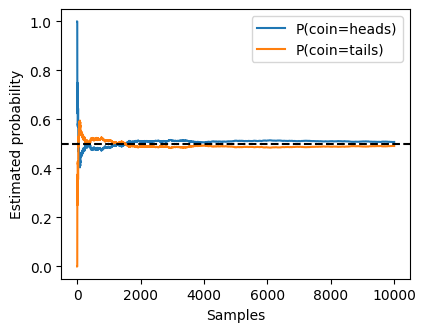

In [33]:
import matplotlib.pyplot as plt

counts = Multinomial(1, fair_probs).sample((10000,))
print(counts)
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(estimates)
estimates = estimates.numpy()

plt.rcParams['figure.figsize'] = (4.5, 3.5)
plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

In [34]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.

    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.

    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the curre